In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Tue, 06 Aug 2024 06:45


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"660,970","598,724","-62,246",-9.42%
Freeway,"27,348,202","37,503,765","10,155,563",37.13%
HOV,"182,166","298,553","116,387",63.89%
Ramp,"202,076","69,098","-132,978",-65.81%
Total,"28,393,414","38,470,140","10,076,726",35.49%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"16,879,845","20,141,900","3,262,055",19.33%
Kitsap,"2,205,567","6,982,222","4,776,655",216.57%
Pierce,"5,552,519","5,314,775","-237,744",-4.28%
Snohomish,"3,755,483","6,031,243","2,275,760",60.60%
Total,"28,393,414","38,470,140","10,076,726",35.49%


----
### Daily | Scatterplots 

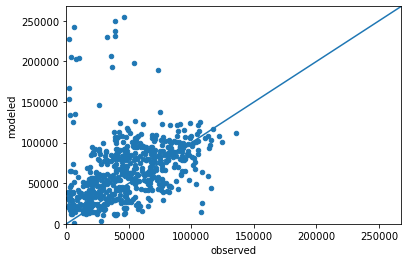

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.33949559183817335


---
By County

King r^2: 0.42798737334893977
Kitsap r^2: 0.18490770376105034
Pierce r^2: 0.6151920983518296
Snohomish r^2: 0.7151636083152395

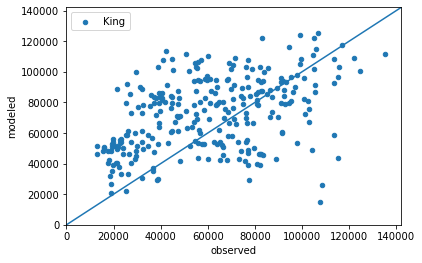

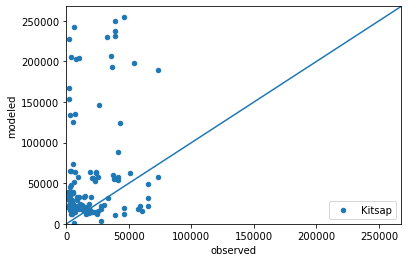

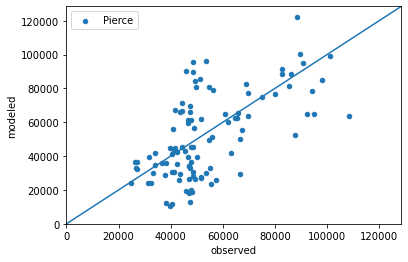

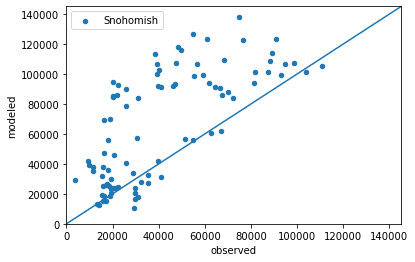

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.3212935955438904


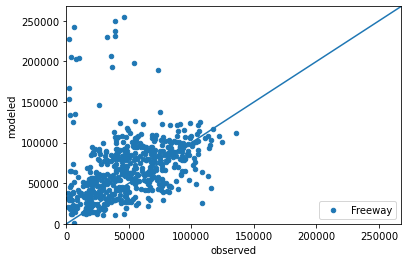

In [10]:
for factype in ['Freeway']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.679722153607113


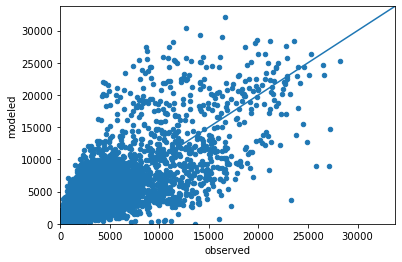

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"582,116","528,395",King,"-53,721",-9.23%
1,KENT,"552,442","501,309",King,"-51,133",-9.26%
2,SEATTLE - SOUTH OF CBD,"473,322","499,833",King,"26,511",5.60%
3,SHIP CANAL,"434,069","527,297",King,"93,228",21.48%
4,SOUTH BELLEVUE,"389,700","372,010",King,"-17,690",-4.54%
5,MILL CREEK,"387,047","375,003",King,"-12,044",-3.11%
6,KIRKLAND-REDMOND,"381,663","397,398",King,"15,735",4.12%
7,SEATTLE - NORTH,"341,251","376,337",King,"35,086",10.28%
8,TACOMA - EAST OF CBD,"300,463","349,329",Pierce,"48,866",16.26%
9,PARKLAND,"297,722","271,134",Pierce,"-26,588",-8.93%


r^2 : 0.9814047995259482


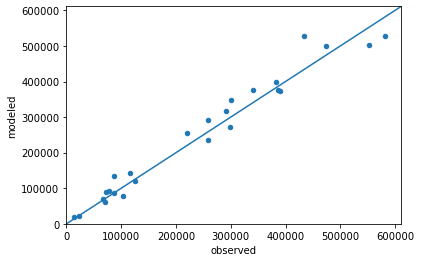

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_boardings','model_boardings','diff']] = df[['observed_boardings','model_boardings','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_boardings', ascending=False)

,agency,observed_boardings,model_boardings,diff,perc_diff
2,King County Metro,"253,314","288,751","35,437",13.99%
5,Sound Transit,"113,374","126,234","12,860",11.34%
0,Community Transit,"25,962","20,876","-5,086",-19.59%
4,Pierce Transit,"21,185","16,690","-4,495",-21.22%
6,Washington Ferries,"9,278","8,406",-872,-9.40%
3,Kitsap Transit,"7,789","33,140","25,351",325.47%
1,Everett Transit,"4,201","2,453","-1,748",-41.61%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,973 W Sea Water Taxi,759,903,144,18.92%
1,975 Vashn Water Taxi,338,817,479,141.84%
2,WSF Edmonds-Kingston,"1,500",229,"-1,271",-84.74%
3,WSF Seattle-Bain Isl,"5,514","5,655",142,2.57%
4,WSF Seattle-Brem,"1,189",344,-845,-71.04%
5,WSF Fauntleroy-Swrth,143,520,377,264.73%
6,WSF Fauntleroy-Vashn,560,"1,422",862,153.99%
7,WSF Vashon-Southwrth,108,95,-12,-11.54%
8,WSF Pt Def-Tahlequah,265,140,-125,-47.13%


r^2 : 0.9272190340207095


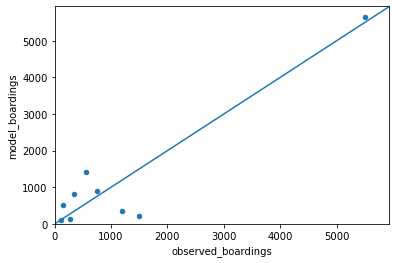

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4203,Seattle-Kingston FF,723
2,4200,Seattle-Bremerton FF,420
3,4201,Brem-Pt Orchard FF,412
0,1973,973 W Sea Water Taxi,279
1,1975,975 Vashn Water Taxi,147
7,5002,WSF Seattle-Bain Isl,102
11,5007,WSF Pt Def-Tahlequah,65
10,5005,WSF Fauntleroy-Vashn,61
9,5004,WSF Fauntleroy-Swrth,32
8,5003,WSF Seattle-Brem,20


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_boardings','model_boardings']] = df[['observed_boardings','model_boardings']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_boardings,model_boardings,diff,perc_diff
0,Link Red Line,"79,522","61,174","-18,348",-23.07%
1,Sounder South,"6,038","9,410","3,372",55.85%
2,Sounder North,316,14,-302,-95.61%


r^2 : 0.9969341653297217


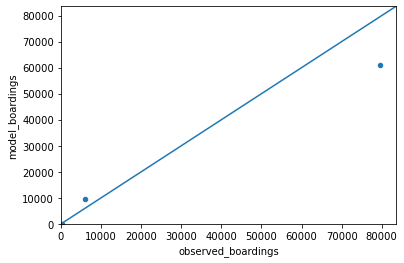

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('model_boardings', ascending=False)

,description,observed_boardings,model_boardings,diff,perc_diff
6,E Line RapidRide,"11,426","17,198","5,772",50.52%
4,C Line RapidRide,"7,250","13,259","6,009",82.89%
1,KC Metro 40,"7,208","10,608","3,400",47.17%
10,Sound Transit 550,"3,351","9,494","6,143",183.32%
0,KC Metro 7,"9,954","9,166",-788,-7.92%
5,D Line RapidRide,"9,044","8,101",-943,-10.42%
2,A Line RapidRide,"8,412","6,342","-2,070",-24.61%
7,F Line RapidRide,"4,748","4,899",151,3.18%
3,B Line RapidRide,"4,177","3,659",-518,-12.40%
9,First Hill Streetcar,"3,900",937,"-2,964",-75.98%


r^2 : 0.7465927724256375


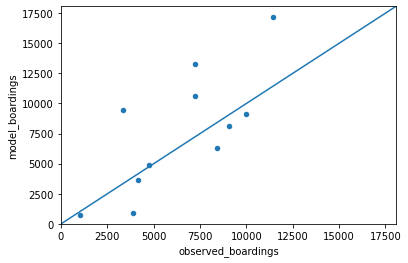

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings')
    lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.9328766813709843
r^2 Everett Transit: 0.9401297517175147
r^2 King County Metro: 0.8979341428674674
r^2 Kitsap Transit: 0.8590986465565857
r^2 Pierce Transit: 0.7554269977214172
r^2 Sound Transit: 0.985534493849471


r^2 Washington Ferries: 0.9335451439314667


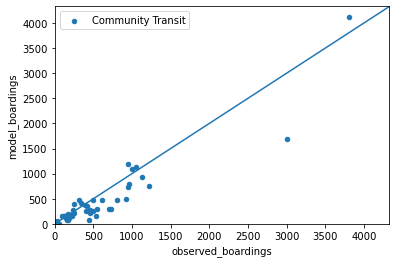

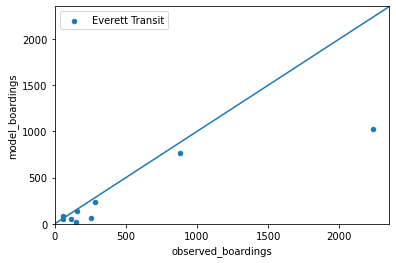

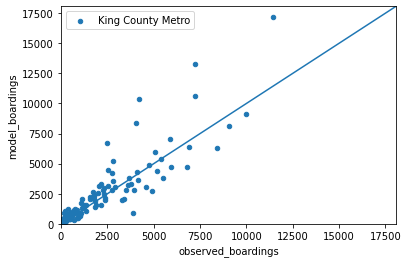

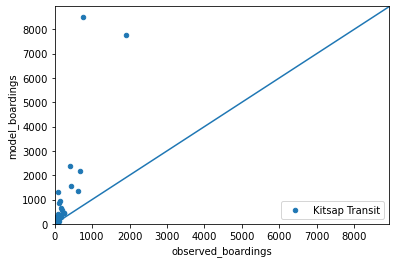

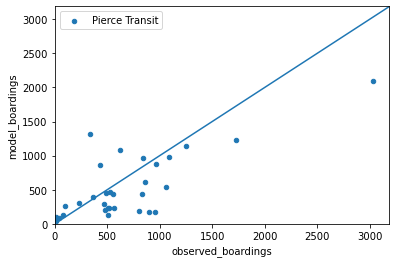

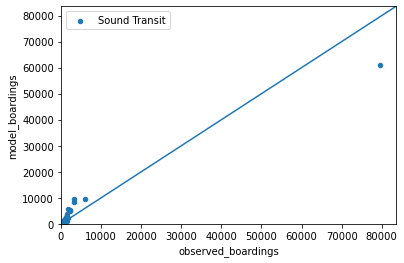

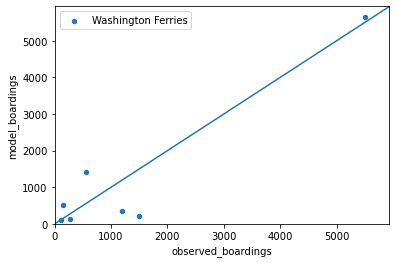

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_boardings', y='model_boardings', label=agency)
        lim = _df[['observed_boardings','model_boardings']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_boardings'],_df['model_boardings'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['model_boardings']-df['observed_boardings']
df['percent_diff'] = df['diff']/df['observed_boardings']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_boardings,model_boardings,diff,percent_diff
station_name,,,,
Husky Stadium,"6,134","3,747","-2,387",-38.92%
Westlake,"8,845","7,353","-1,492",-16.86%
University St,"4,324","4,828",504,11.65%
Pioneer Square,"2,400","4,262","1,862",77.59%
Int'l District,"4,399","1,459","-2,940",-66.82%
Capitol Hill,"7,667","4,837","-2,830",-36.91%
Stadium,"1,731",438,"-1,293",-74.71%
SODO,"1,669","2,426",757,45.35%
Beacon Hill,"2,147",802,"-1,345",-62.64%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_boardings','model_boardings']]
df_combined['diff'] = df_combined['model_boardings']-df_combined['observed_boardings']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_boardings']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_boardings,model_boardings,diff,percent_diff
station_group,,,,
Husky Stadium,"6,134","3,747","-2,387",-38.92%
Capitol Hill,"7,667","4,837","-2,830",-36.91%
Westlake/University St,"13,169","12,181",-988,-7.50%
Pioneer Square/Int'l District,"6,799","5,722","-1,077",-15.85%
Stadium/SODO,"3,400","2,864",-536,-15.77%
Beacon Hill/Mount Baker,"4,008","1,744","-2,264",-56.48%
Columbia City,"1,630",895,-735,-45.09%
Othello/Rainier Beach,"3,525","1,958","-1,567",-44.45%
Tukwila Int'l Blvd,"2,298","1,619",-679,-29.55%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.92,-99.00,99.92,-100.93%
Westlake,0.15,0.36,-0.21,-57.68%
University St,0.23,0.20,0.03,15.78%
Pioneer Square,0.47,0.16,0.31,195.08%
Int'l District,0.68,0.45,0.23,51.89%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.23,0.12,0.11,92.66%
SODO,0.46,0.31,0.15,47.23%
Beacon Hill,0.33,0.35,-0.02,-6.32%


# Externals

In [26]:
# df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')

# pd.options.display.float_format = '{:0,.0f}'.format
# df = df.drop('diff', axis=1)
# df['diff'] = df['modeled']-df['observed']
# df = df.fillna(0)
# df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
# df['percent_diff'] = df['diff']/df['observed']
# df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

# df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
# df.replace('nan', '', regex=True)

# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

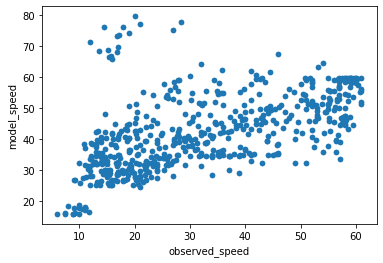

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

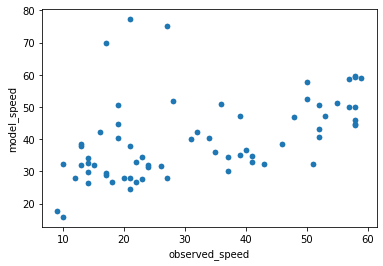

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,46.03,58.00
15,Everett to Seattle - SB,27.99,27.00
24,Tacoma to Seattle - NB,31.40,24.00
33,Seattle to Tacoma - SB,44.40,58.00
42,Bellevue to Lynnwood - NB,49.91,57.00
51,Lynnwood to Bellevue - SB,26.77,22.00
60,Tukwila to Bellevue - NB,27.80,20.00
69,Bellevue to Tukwila - SB,32.22,43.00
78,Auburn to Renton - NB,32.82,22.00
87,Renton to Auburn - SB,51.24,55.00


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

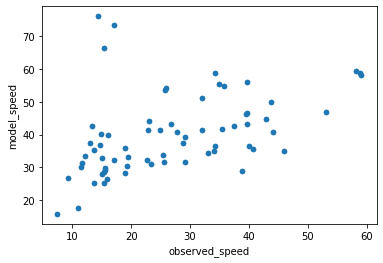

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,31.17,23.40
10,Everett to Seattle - SB,40.88,27.70
19,Tacoma to Seattle - NB,44.87,42.90
28,Seattle to Tacoma - SB,33.72,25.40
37,Bellevue to Lynnwood - NB,31.64,25.60
46,Lynnwood to Bellevue - SB,43.29,39.60
55,Tukwila to Bellevue - NB,31.65,29.20
64,Bellevue to Tukwila - SB,28.43,18.90
73,Auburn to Renton - NB,49.86,43.70
82,Renton to Auburn - SB,36.51,34.20
